In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np
import numpy.linalg as la

# 3a

Since there are three types of flowers, we can label the setosa flower as -1, the versicolor flower as 0, and the virginica flower as 1. Then, once we produce a real-valued prediction, we can turn that into a discrete prediction by finding whether our real-valued prediction is closest to -1, 0, or 1.

# 3b

In [2]:
def plot_matrix_pairwise_column_inner_prods(X: np.ndarray) -> None:
    """
    This function plots X^T X.

    Inputs: X (np.ndarray): has shape (n, p).
    """
    plt_arr = X.T @ X
    print(plt_arr)

    # find the max of the absolute vals of X^T X to set the colorscale
    max_val = np.max(np.abs(plt_arr))

    # This color norm ensures that 0 is always plotted as white
    color_norm = colors.TwoSlopeNorm(vmin=-1 * max_val, vcenter=0, vmax=max_val)

    plt.imshow(plt_arr, cmap="bwr", norm=color_norm)
    plt.ylabel("Row i", size=15)
    plt.xlabel("Column j", size=15)
    plt.colorbar()
    plt.title("$X^\\top X$", size=20)
    plt.show()

[[ 5.22385000e+03  2.67343000e+03  3.48376000e+03  1.12814000e+03
   9.38660038e-13]
 [ 2.67343000e+03  1.43040000e+03  1.67430000e+03  5.31890000e+02
  -1.50990331e-13]
 [ 3.48376000e+03  1.67430000e+03  2.58271000e+03  8.69110000e+02
  -1.08657305e-13]
 [ 1.12814000e+03  5.31890000e+02  8.69110000e+02  3.02330000e+02
  -1.42968982e-16]
 [ 9.38660038e-13 -1.50990331e-13 -1.08657305e-13 -1.42968982e-16
   7.71772902e+00]]


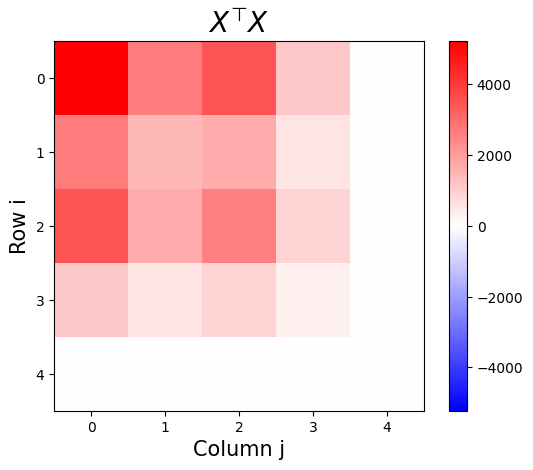

In [3]:
# STARTER CODE
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import colors

# load data, make sure `fisheriris.mat` is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
X = data["meas"]
y_text = data["species"]

############################
# YOUR CODE BELOW
# Process and assign numerical values to
# `y` according to your (a), make sure `y` is a 1d numpy array.
# If dimensions are mismatching, you may find `y = y.flatten()` useful.
y = np.copy(y_text)
y[y == "setosa"] = -1
y[y == "versicolor"] = 0
y[y == "virginica"] = 1
y = np.array(y, dtype=float)

# Compute the least squares weights
w = la.inv(X.T @ X) @ X.T @ y

# Compute the residuals
r = y - X @ w

# Make a plot
A = np.column_stack((X, r))
plot_matrix_pairwise_column_inner_prods(A)

In this method, we used the given code from the recitation to plot rows against columns for $X^T \cdot X$. Here, the only entries that are of concern are where row $i = 0, 1, 2, 3$ and column $j = 4$, representing $X_1, X_2, X_3, X_4$ and $r$, respectively. To ensure that $r$ is orthogonal to the columns of $X$, we compute the inner product between $X_i$ and $r$ and see that they are all $0$, which we printed out above the plot.

Nonetheless, another way to calculate this without using a plot is to simply compute $X^T \cdot r$ and see that we approximately get the $0$ vector as follows:

In [4]:
X.T @ r

array([[ 9.40136857e-13],
       [-1.49213975e-13],
       [-1.15463195e-13],
       [-2.99760217e-15]])

## Problem 3c

In [5]:
# STARTER CODE
import numpy as np
import scipy.io

# load data, make sure `fisheriris.mat` is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data["meas"]
y_text = data["species"]

############################
# YOUR CODE BELOW
# Process and assign numerical values to
# `y` according to your (a), make sure `y` is a 1d numpy array.
# If dimensions are mismatching, you may find `y = y.flatten()` useful.
y = np.copy(y_text)
y[y == "setosa"] = -1
y[y == "versicolor"] = 0
y[y == "virginica"] = 1
y = np.array(y, dtype=float)

# number of random trials
N = 10_000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40

for i in np.arange(N):
    # initialize 0-length arrays for the train and holdout indices. These
    # arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)

    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))

    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]

    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights
    w = la.inv(Xt.T @ Xt) @ Xt.T @ yt

    # Make predictions using the LS weights
    predictions = Xh @ w

    # Turn the real-valued predictions into class labels
    for k in range(len(predictions)):
        dist_neg, dist_zero, dist_pos = (
            abs(predictions[k] + 1),
            abs(predictions[k]),
            abs(predictions[k] - 1),
        )
        min_dist = min(dist_neg, dist_zero, dist_pos)
        if min_dist == dist_neg:
            predictions[k] = -1
        if min_dist == dist_zero:
            predictions[k] = 0
        if min_dist == dist_pos:
            predictions[k] = 1

    # Compute the errors
    count = 0
    for k in range(len(predictions)):
        if predictions[k] != yh[k]:
            count += 1
    errs[i] = count / 30

In [6]:
sum(errs) / len(errs)

0.031970000000001116

As seen here, the average test error is roughly 3.2%, which indicates our model was quite successful.

## Problem 3d

In [7]:
# STARTER CODE
import numpy as np
import scipy.io

# load data, make sure `fisheriris.mat` is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data["meas"]
y_text = data["species"]
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# `y` according to your (a), make sure `y` is a 1d numpy array.
# If dimensions are mismatching, you may find `y = y.flatten()` useful.
y = np.copy(y_text)
y[y == "setosa"] = -1
y[y == "versicolor"] = 0
y[y == "virginica"] = 1
y = np.array(y, dtype=float)


# number of random trials
N = 1_000
# Min / Max size of the training set
min_num_train = 4
max_num_train = 40

# Arrays to store error rates
train_errs = np.zeros((max_num_train - min_num_train, N))
test_errs = np.zeros((max_num_train - min_num_train, N))

n_train_vals = np.arange(min_num_train, max_num_train)


for j, n_train in enumerate(n_train_vals):
    for i in np.arange(N):
        # initialize 0-length arrays for the train and holdout indices.
        # These arrays will be filled in the inner loop.
        idx_train = np.zeros(0, dtype=np.intp)
        idx_holdout = np.zeros(0, dtype=np.intp)

        # There are 3 label types and 50 samples of each type
        for label_type in range(3):
            # Choose a random ordering of the 50 samples
            r = np.random.permutation(50)
            # Add the first num_train indices of the random ordering to
            # the idx_train array
            idx_train = np.concatenate((idx_train, 50 * label_type + r[:n_train]))
            # Add the rest of the indices to the idx_holdout array
            idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[n_train:]))

        # divide data and labels into the train and holdout sets
        Xt = X[idx_train]
        yt = y[idx_train]
        Xh = X[idx_holdout]
        yh = y[idx_holdout]

        ########################
        # YOUR CODE BELOW
        # Solve for the LS weights
        w = la.inv(Xt.T @ Xt) @ Xt.T @ yt

        # Make predictions using the LS weights
        predictions_train = Xt @ w
        predictions_test = Xh @ w

        # Turn the real-valued predictions into class labels
        for k in range(len(predictions_train)):
            dist_neg, dist_zero, dist_pos = (
                abs(predictions_train[k] + 1),
                abs(predictions_train[k]),
                abs(predictions_train[k] - 1),
            )
            min_dist = min(dist_neg, dist_zero, dist_pos)
            if min_dist == dist_neg:
                predictions_train[k] = -1
            if min_dist == dist_zero:
                predictions_train[k] = 0
            if min_dist == dist_pos:
                predictions_train[k] = 1

        for k in range(len(predictions_test)):
            dist_neg, dist_zero, dist_pos = (
                abs(predictions_test[k] + 1),
                abs(predictions_test[k]),
                abs(predictions_test[k] - 1),
            )
            min_dist = min(dist_neg, dist_zero, dist_pos)
            if min_dist == dist_neg:
                predictions_test[k] = -1
            if min_dist == dist_zero:
                predictions_test[k] = 0
            if min_dist == dist_pos:
                predictions_test[k] = 1

        # Compute the errors
        count_train = 0
        for k in range(len(predictions_train)):
            if predictions_train[k] != yt[k]:
                count_train += 1

        count_test = 0
        for k in range(len(predictions_test)):
            if predictions_test[k] != yh[k]:
                count_test += 1

        train_errs[j][i] = count_train / Xt.shape[0]
        test_errs[j][i] = count_test / Xh.shape[0]

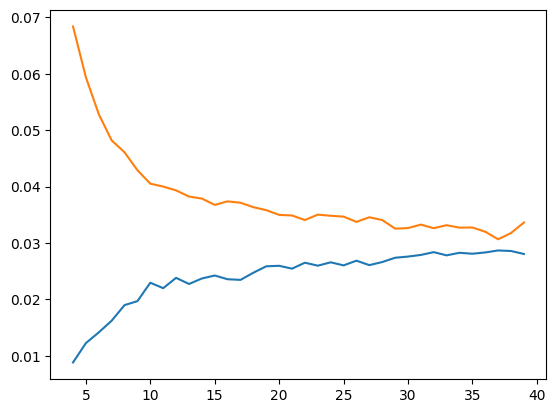

In [8]:
###################
# YOUR CODE BELOW
# Make a plot of the train and test errors as a function of
# training set size
avg_train_errs = [
    sum(train_errs[j]) / len(train_errs[j])
    for j in range(max_num_train - min_num_train)
]
avg_test_errs = [
    sum(test_errs[j]) / len(test_errs[j]) for j in range(max_num_train - min_num_train)
]

plt.plot(n_train_vals, avg_train_errs)
plt.plot(n_train_vals, avg_test_errs)

In the plot above, the train error is in blue and test error is in orange. We see that as the size of the training set increases, the train error increases which makes sense since it is a lot easier to classify the data accurately when there are fewer things to classify. On the other hand, as the size of the training set increases, the test error decreases which makes sense because we are able to train our data more effectively using the larger training set.

The end goal is to predict a new data point accurately, and we observe that the train and test set error are nearly identical when the number of samples is around $40$. Therefore, it would be a good idea to use $40$ as the training size, since then we get roughly similar performance on train and test data, and there is sufficient data for the training to occur properly. We also see that at this point, we stop improving our training accuracy and decreasing our test accuracy, so it suggests asymptotic behavior where we will get little improvement if we keep increasing our training size.

# 3e

In [9]:
# STARTER CODE
import numpy as np
import scipy.io

# load data, make sure `fisheriris.mat` is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data["meas"]
y_text = data["species"]

############################
# YOUR CODE BELOW
# Process and assign numerical values to
# `y` according to your (a), make sure `y` is a 1d numpy array.
# If dimensions are mismatching, you may find `y = y.flatten()` useful.
y = np.copy(y_text)
y[y == "setosa"] = -1
y[y == "versicolor"] = 0
y[y == "virginica"] = 1
y = np.array(y, dtype=float)
X = X[:, [0, 2]]

# number of random trials
N = 10_000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40

for i in np.arange(N):
    # initialize 0-length arrays for the train and holdout indices. These
    # arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)

    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train, 50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout, 50 * label_type + r[num_train:]))

    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]

    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights
    w = la.inv(Xt.T @ Xt) @ Xt.T @ yt

    # Make predictions using the LS weights
    predictions = Xh @ w

    # Turn the real-valued predictions into class labels
    for k in range(len(predictions)):
        dist_neg, dist_zero, dist_pos = (
            abs(predictions[k] + 1),
            abs(predictions[k]),
            abs(predictions[k] - 1),
        )
        min_dist = min(dist_neg, dist_zero, dist_pos)
        if min_dist == dist_neg:
            predictions[k] = -1
        if min_dist == dist_zero:
            predictions[k] = 0
        if min_dist == dist_pos:
            predictions[k] = 1

    # Compute the errors
    count = 0
    for k in range(len(predictions)):
        if predictions[k] != yh[k]:
            count += 1
    errs[i] = count / 30

In [10]:
sum(errs) / len(errs)

0.05715666666667161

As seen here, the average test error is roughly 5.7%, which indicates our model was quite successful. This error is higher than when we used all features, which intuitively makes sense because we are losing information by dropping some features, making it harder to classify the data points accurately. Note that the only change we made to this code from before was changing $X$ to only include the first and third columns: $X = X[:, [0, 2]]$.

# 4c

In [11]:
### STARTER CODE
import numpy as np
import numpy.linalg as la

p = np.array([[4, 6, 0.0], [2, 3, 0.0], [0.0, 3, 1.0]])
### YOUR CODE BELOW

y1 = np.array([[1], [0], [0]])
y2 = np.array([[0], [1], [0]])
y3 = np.array([[0], [0], [1]])

v1 = p @ y1
v2 = p @ y2
v3 = p @ y3

u1 = v1 / la.norm(v1)

v2bar = v2 - (u1.T @ v2) * u1
u2 = v2bar / la.norm(v2bar)

v3bar = v3 - (u1.T @ v3) * u1 - (u2.T @ v3) * u2
v3bar

array([[0.],
       [0.],
       [0.]])

In this case, it is evident that the third vector is 0 which aligns with our understanding that the subspace is a plane in $R^3$, so it can be spanned by 2 linearly independent vectors that lie in the plane.

In [12]:
print(u1)
print(u2)

[[0.89442719]
 [0.4472136 ]
 [0.        ]]
[[0.]
 [0.]
 [1.]]
